In [1]:
import mne
from mne.datasets import sample

In [2]:
from mne.coreg import Coregistration

In [3]:
subject="sub-032304"
subjects_dir="/home/erikc/freesurfer/subjects"

## Computing and visualizing BEM surfaces

Using surface: /home/aiisc/Downloads/freesurfer/subjects/sub-032304-bak-aug27/bem/inner_skull.surf
Using surface: /home/aiisc/Downloads/freesurfer/subjects/sub-032304-bak-aug27/bem/outer_skull.surf
Using surface: /home/aiisc/Downloads/freesurfer/subjects/sub-032304-bak-aug27/bem/outer_skin.surf


/home/aiisc/mne-python/1.5.0_0/lib/python3.11/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


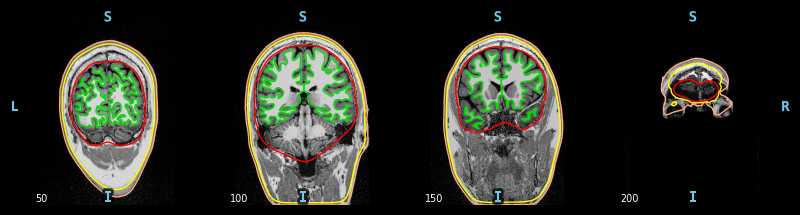

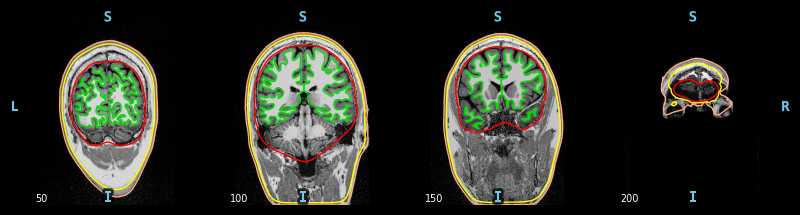

In [4]:
plot_bem_kwargs = dict(
    subject=subject,
    subjects_dir=subjects_dir,
    brain_surfaces="white",
    orientation="coronal",
    slices=[50, 100, 150, 200],
)

mne.viz.plot_bem(**plot_bem_kwargs)

## Visualizing coregistration

In [5]:
eeg_raw = mne.io.read_raw_eeglab("/home/aiisc/Downloads/sub-032304_eeg/sub-032304_EC.set")
info = eeg_raw.info
fiducials = "estimated"
coreg = Coregistration(info, subject, subjects_dir, fiducials=fiducials)

Reading /home/aiisc/Downloads/sub-032304_eeg/sub-032304_EC.fdt
    Triangle neighbors and vertex normals...
Using low resolution head model in /home/aiisc/Downloads/freesurfer/subjects/sub-032304-bak-aug27/bem/outer_skin.surf
    Triangle neighbors and vertex normals...


/tmp/ipykernel_328143/848161528.py:1: RuntimeWarning: Data file name in EEG.data (sub-010005_EC.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032304_EC.fdt).
  eeg_raw = mne.io.read_raw_eeglab("/home/aiisc/Downloads/sub-032304_eeg/sub-032304_EC.set")
/tmp/ipykernel_328143/848161528.py:1: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  eeg_raw = mne.io.read_raw_eeglab("/home/aiisc/Downloads/sub-032304_eeg/sub-032304_EC.set")
/tmp/ipykernel_328143/848161528.py:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  eeg_raw = mne.io.read_raw_eeglab("/home/aiisc/Downloads/sub-032304_eeg/sub-032304_EC.set")


Estimating fiducials from fsaverage.


In [6]:
mne.viz.plot_alignment(info, trans=coreg.trans, subject=subject, subjects_dir=subjects_dir)

Using pyvistaqt 3d backend.



RuntimeError: 

## Compute source space

In [9]:
src = mne.setup_source_space(
    subject, spacing="oct4", add_dist="patch", subjects_dir=subjects_dir
)
print(src)

Setting up the source space with the following parameters:

SUBJECTS_DIR = /home/aiisc/Downloads/freesurfer/subjects
Subject      = sub-032304-bak-aug27
Surface      = white
Octahedron subdivision grade 4

>>> 1. Creating the source space...

Doing the octahedral vertex picking...
Loading /home/aiisc/Downloads/freesurfer/subjects/sub-032304-bak-aug27/surf/lh.white...
Mapping lh sub-032304-bak-aug27 -> oct (4) ...
    Triangle neighbors and vertex normals...
Loading geometry from /home/aiisc/Downloads/freesurfer/subjects/sub-032304-bak-aug27/surf/lh.sphere...
Setting up the triangulation for the decimated surface...
loaded lh.white 258/144356 selected to source space (oct = 4)

Loading /home/aiisc/Downloads/freesurfer/subjects/sub-032304-bak-aug27/surf/rh.white...
Mapping rh sub-032304-bak-aug27 -> oct (4) ...
    Triangle neighbors and vertex normals...
Loading geometry from /home/aiisc/Downloads/freesurfer/subjects/sub-032304-bak-aug27/surf/rh.sphere...
Setting up the triangulation fo

In [10]:
mne.write_source_spaces('/home/aiisc/Downloads/freesurfer/subjects/sub-032304-bak-aug27/bem/sub-032304-bak-aug27-src.fif', src, overwrite=True)

Overwriting existing file.
    Write a source space...
    [done]
    Write a source space...
    [done]
    2 source spaces written


Using surface: /home/aiisc/Downloads/freesurfer/subjects/sub-032304-bak-aug27/bem/inner_skull.surf
Using surface: /home/aiisc/Downloads/freesurfer/subjects/sub-032304-bak-aug27/bem/outer_skull.surf
Using surface: /home/aiisc/Downloads/freesurfer/subjects/sub-032304-bak-aug27/bem/outer_skin.surf


/home/aiisc/mne-python/1.5.0_0/lib/python3.11/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


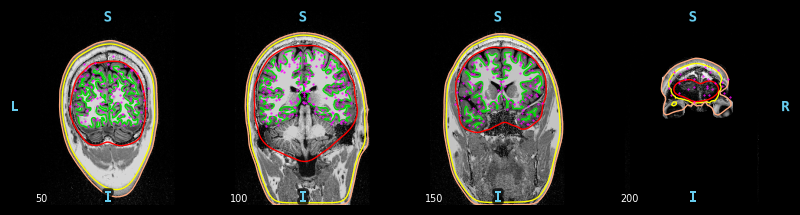

In [8]:
mne.viz.plot_bem(src=src, **plot_bem_kwargs)

Sphere                : origin at (0.0 0.0 40.0) mm
              radius  : 90.0 mm
grid                  : 5.0 mm
mindist               : 5.0 mm
MRI volume            : /home/aiisc/Downloads/freesurfer/subjects/sub-032304-bak-aug27/mri/T1.mgz

Reading /home/aiisc/Downloads/freesurfer/subjects/sub-032304-bak-aug27/mri/T1.mgz...

Setting up the sphere...
Surface CM = (   0.0    0.0   40.0) mm
Surface fits inside a sphere with radius   90.0 mm
Surface extent:
    x =  -90.0 ...   90.0 mm
    y =  -90.0 ...   90.0 mm
    z =  -50.0 ...  130.0 mm
Grid extent:
    x =  -95.0 ...   95.0 mm
    y =  -95.0 ...   95.0 mm
    z =  -50.0 ...  135.0 mm
57798 sources before omitting any.
24365 sources after omitting infeasible sources not within 0.0 - 90.0 mm.
20377 sources remaining after excluding the sources outside the surface and less than    5.0 mm inside.
Adjusting the neighborhood info.
Source space : MRI voxel -> MRI (surface RAS)
     0.005000  0.000000  0.000000     -95.00 mm
     0.0000

/home/aiisc/mne-python/1.5.0_0/lib/python3.11/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


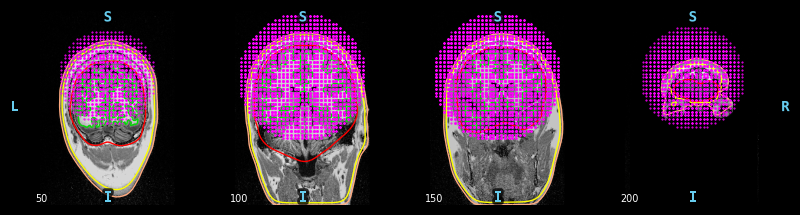

In [9]:
sphere = (0.0, 0.0, 0.04, 0.09)
vol_src = mne.setup_volume_source_space(
    subject,
    subjects_dir=subjects_dir,
    sphere=sphere,
    sphere_units="m",
    add_interpolator=False,
)  # just for speed!
print(vol_src)

mne.viz.plot_bem(src=vol_src, **plot_bem_kwargs)

In [17]:
mne.write_source_spaces('/home/aiisc/Downloads/freesurfer/subjects/sub-032304-bak-aug27/bem/sub-032304-bak-aug27-vol-src.fif', vol_src)

    Write a source space...
    [done]
    1 source spaces written


In [10]:
"""fig = mne.viz.plot_alignment(
    subject=subject,
    subjects_dir=subjects_dir,
    surfaces="white",
    coord_frame="mri",
    src=src,
)"""
"""mne.viz.set_3d_view(
    fig,
    azimuth=173.78,
    elevation=101.75,
    distance=0.30,
    focalpoint=(-0.03, -0.01, 0.03),
)"""

'mne.viz.set_3d_view(\n    fig,\n    azimuth=173.78,\n    elevation=101.75,\n    distance=0.30,\n    focalpoint=(-0.03, -0.01, 0.03),\n)'

## Computing the forward solution

In [10]:
#conductivity = (0.3,)  # for single layer
conductivity = (0.3, 0.006, 0.3)  # for three layers
model = mne.make_bem_model(
    subject="sub-032304-bak-aug27", ico=4, conductivity=conductivity, subjects_dir=subjects_dir
)
bem = mne.make_bem_solution(model)

Creating the BEM geometry...
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
outer skin  CM is   3.79 -19.06   6.52 mm
outer skull CM is   3.81 -18.92   6.09 mm
inner skull CM is   3.10 -21.05  14.34 mm
Checking that surface outer skull is inside surface outer skin  ...
Checking that surface inner skull is inside surface outer skull ...
Checking distance between outer skin  and outer skull surfaces...
Minimum distance between the outer skin  and outer skull surfaces is approximately    0.5 mm
Checking distance between outer skull and inner skull surfaces...
Minimum distance between the outer skull and inner skull surfaces is approximately    0.7 mm
Surfaces passed the basic topology checks.
Complete.

Three-layer model surfaces loaded.
Computing the linear collocation solution...
    Matrix coefficients...
     

In [12]:
mne.write_bem_solution('/home/aiisc/Downloads/freesurfer/subjects/sub-032304-bak-aug27/sub-032304-bak-aug27_bem-sol.fif', bem)

In [12]:
fwd = mne.make_forward_solution(
    eeg_raw.info,
    trans=coreg.trans,
    src=src,
    bem=bem,
    meg=False,
    eeg=True,
    mindist=5.0,
    n_jobs=None,
    verbose=True,
)
print(fwd)

Source space          : <SourceSpaces: [<surface (lh), n_vertices=144356, n_used=258>, <surface (rh), n_vertices=144586, n_used=258>] MRI (surface RAS) coords, subject 'sub-032304', ~26.5 MB>
MRI -> head transform : instance of Transform
Measurement data      : instance of Info
Conductor model   : instance of ConductorModel
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 2 source spaces a total of 516 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     1.000000  0.000000  0.000000       0.00 mm
     0.000000  1.000000  0.000000       0.00 mm
     0.000000  0.000000  1.000000       0.00 mm
     0.000000  0.000000  0.000000       1.00

Read  61 EEG channels from info
Head coordinate coil definitions created.
Source spaces are now in head coordinates.

Employing the head->MRI coordinate transform with the BEM model.
BEM model instance of ConductorModel is now set up

Source spaces are in head coordinates.
Checki

In [13]:
print(f"Before: {src}")
print(f'After:  {fwd["src"]}')

Before: <SourceSpaces: [<surface (lh), n_vertices=144356, n_used=258>, <surface (rh), n_vertices=144586, n_used=258>] MRI (surface RAS) coords, subject 'sub-032304', ~26.5 MB>
After:  <SourceSpaces: [<surface (lh), n_vertices=144356, n_used=258>, <surface (rh), n_vertices=144586, n_used=258>] head coords, subject 'sub-032304', ~26.5 MB>


In [14]:
leadfield = fwd["sol"]["data"]
print("Leadfield size : %d sensors x %d dipoles" % leadfield.shape)

Leadfield size : 61 sensors x 1548 dipoles


In [15]:
fwd_fixed = mne.convert_forward_solution(
    fwd, surf_ori=True, force_fixed=True, use_cps=True
)
leadfield = fwd_fixed["sol"]["data"]
print("Leadfield size : %d sensors x %d dipoles" % leadfield.shape)

    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Leadfield size : 61 sensors x 516 dipoles


In [17]:
mne.write_forward_solution("sub_032304_fwd.fif", fwd, overwrite=False, verbose=None)

    Write a source space...
    [done]
    Write a source space...
    [done]
    2 source spaces written


### FOR TROUBLESHOOTING INNER SKULL VS OUTER SKULL

In [30]:
pip install git+https://github.com/lina-usc/sources_snl.git

  Cloning https://github.com/lina-usc/sources_snl.git to /tmp/pip-req-build-mo6l038a
  Running command git clone --filter=blob:none --quiet https://github.com/lina-usc/sources_snl.git /tmp/pip-req-build-mo6l038a
  Resolved https://github.com/lina-usc/sources_snl.git to commit 0b3e265313940abb6c23bac7b9eb1c3aa18318ba
  Preparing metadata (setup.py) ... done
  Created wheel for sources-snl: filename=sources_snl-0.0.1-py3-none-any.whl size=9198 sha256=3afbdd5a4ef0720c16b0f2b54063f8c2f9e26038382cc6c7804a6123dfc84abb
  Stored in directory: /tmp/pip-ephem-wheel-cache-ssqc4gsu/wheels/d7/bd/fb/5ba9ae656c200412e9cc3ad9fe4ac218cdf83f77680ee91919
Successfully built sources-snl
Note: you may need to restart the kernel to use updated packages.


In [11]:
import sources_snl
from sources_snl.source_estimator import correct_intersecting_meshes
from pathlib import Path

In [12]:
correct_intersecting_meshes(Path("/home/aiisc/Downloads/freesurfer/subjects"), "sub-032304", suffix="")

inner:  /home/aiisc/Downloads/freesurfer/subjects/sub-032304/surf/lh.pial
outer:  /home/aiisc/Downloads/freesurfer/subjects/sub-032304/bem/inner_skull.surf
inner:  /home/aiisc/Downloads/freesurfer/subjects/sub-032304/surf/rh.pial
outer:  /home/aiisc/Downloads/freesurfer/subjects/sub-032304/bem/inner_skull.surf
inner:  /home/aiisc/Downloads/freesurfer/subjects/sub-032304/bem/inner_skull.surf
outer:  /home/aiisc/Downloads/freesurfer/subjects/sub-032304/bem/outer_skull.surf
The inner surface intersect the outer surface. Pushing back the outer surface 0.5 mm out of the inner surface. Saving the outer surface as /home/aiisc/Downloads/freesurfer/subjects/sub-032304/bem/outer_skull.surf.
inner:  /home/aiisc/Downloads/freesurfer/subjects/sub-032304/bem/outer_skull.surf
outer:  /home/aiisc/Downloads/freesurfer/subjects/sub-032304/bem/outer_skin.surf
The inner surface intersect the outer surface. Pushing back the outer surface 0.5 mm out of the inner surface. Saving the outer surface as /home/ai

{'lh.pial': array([0., 0., 0., ..., 0., 0., 0.]),
 'rh.pial': array([0., 0., 0., ..., 0., 0., 0.]),
 'inner_skull.surf': array([0., 0., 0., ..., 0., 0., 0.]),
 'outer_skull.surf': array([0., 0., 0., ..., 0., 0., 0.])}